In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

## Model Training

In [78]:
df = pd.read_csv('data/concrete_data.csv')
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [79]:
df = df.drop_duplicates()

In [80]:
df[['concrete_compressive_strength']].boxplot()

<Axes: >

In [81]:

Q1 = df['concrete_compressive_strength'].quantile(0.25)
Q3 = df['concrete_compressive_strength'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound,upper_bound)

-8.504999999999999 76.895


In [82]:
df = df[(df['concrete_compressive_strength'] > lower_bound) & (df['concrete_compressive_strength'] < upper_bound)]

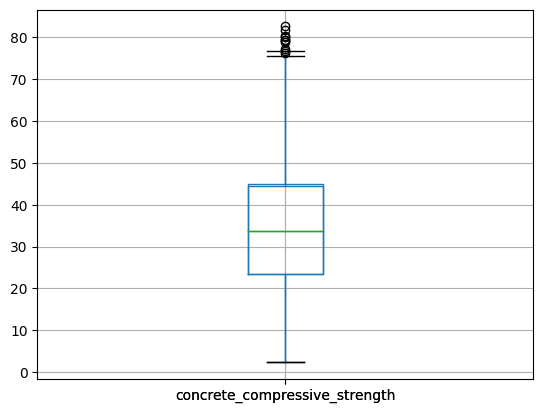

In [83]:
df[['concrete_compressive_strength']].boxplot()
plt.show()

In [84]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.310678,-0.381684,-0.048017,0.054157,-0.089450,-0.242293,0.086527,0.482298
blast_furnace_slag,-0.310678,1.000000,-0.309614,0.138604,0.008556,-0.277670,-0.288899,-0.046140,0.087464
fly_ash,-0.381684,-0.309614,1.000000,-0.293192,0.426515,-0.025204,0.087098,-0.158606,-0.063737
water,-0.048017,0.138604,-0.293192,1.000000,-0.645769,-0.211364,-0.451373,0.282298,-0.255585
superplasticizer,0.054157,0.008556,0.426515,-0.645769,1.000000,-0.241657,0.212463,-0.199195,0.334534
coarse_aggregate,-0.089450,-0.277670,-0.025204,-0.211364,-0.241657,1.000000,-0.161918,-0.003557,-0.154604
fine_aggregate,-0.242293,-0.288899,0.087098,-0.451373,0.212463,-0.161918,1.000000,-0.156914,-0.180918
age,0.086527,-0.046140,-0.158606,0.282298,-0.199195,-0.003557,-0.156914,1.000000,0.345244
concrete_compressive_strength,0.482298,0.087464,-0.063737,-0.255585,0.334534,-0.154604,-0.180918,0.345244,1.000000


In [85]:
# Dividing Independent and dependent variable
X = df.drop('concrete_compressive_strength',axis=1)
y = df['concrete_compressive_strength']

In [86]:
X.shape,y.shape

((997, 8), (997,))

In [91]:
preprocessor = Pipeline(
    steps = [
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',PowerTransformer('yeo-johnson'))
    ]
)

In [92]:
preprocessor

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', PowerTransformer())])

In [93]:
## Train-test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=30)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((697, 8), (300, 8), (697,), (300,))

In [94]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())

In [95]:
X_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,0.229556,1.147235,-0.939041,0.472568,-1.223549,-0.582231,-0.671718,-1.667314
1,1.390274,1.113239,-0.939041,0.192999,0.934820,-1.175560,-0.790135,0.702138
2,-0.143534,-1.047616,-0.939041,0.005238,-1.223549,1.609461,0.642457,-1.049278
3,-0.315153,1.060507,-0.939041,0.333089,0.315508,0.045127,-0.149327,0.099309
4,0.238797,-1.047616,-0.939041,0.472568,-1.223549,-0.820218,1.717383,-1.049278
...,...,...,...,...,...,...,...,...
692,0.238797,-1.047616,-0.939041,0.472568,-1.223549,-0.820218,1.717383,1.119521
693,0.880298,1.136205,-0.939041,0.426142,0.469646,-1.928064,-0.187406,0.099309
694,-1.455159,-1.047616,1.214510,-0.023024,1.279484,-1.745520,1.554728,0.099309
695,-0.840375,-1.047616,1.091445,-0.728593,0.812475,1.329343,0.357457,0.702138


## Model training

In [96]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [97]:
cv = KFold(n_splits=6,shuffle=True,random_state=42)

In [98]:
## Training Mutliple models
models_list = {
    'Linear_Regression':LinearRegression(),
    'Lasso':Lasso(),
    'ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Decision_Tree':DecisionTreeRegressor(),
    'SVR':SVR(),
    'Random_Forest':RandomForestRegressor(),
    'k_nearest':KNeighborsRegressor(),
    'Xgboost':XGBRegressor()
}

In [99]:
def Evaluate_model(actual,predicted):
    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    r2_square = r2_score(actual,predicted)
    return mae,mse,r2_square

In [100]:
r2_list = []
trained_model_list = []

In [101]:
for i in range(len(models_list)):
    model = list(models_list.values())[i]
    model.fit(X_train,y_train)

    # Prediction
    y_pred = model.predict(pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out()))
    
    # Evaluate
    mae,mse,r2_square = Evaluate_model(y_test,y_pred)
    
    trained_model_list.append(list(models_list.keys())[i])

    print(list(models_list.keys())[i])
    print('MOdel Training Performace')
    print('Mean Squared Error : ',mse)
    print('Mean Absolute Error :',mae)
    print('R2_Square :',r2_square)
    print('='*35)
    print('\n')
    r2_list.append(r2_square)


Linear_Regression
MOdel Training Performace
Mean Squared Error :  45.79076459499859
Mean Absolute Error : 5.2099412530992435
R2_Square : 0.8140178000666117


Lasso
MOdel Training Performace
Mean Squared Error :  53.36552157050109
Mean Absolute Error : 5.62343729944599
R2_Square : 0.7832524267708226


ridge
MOdel Training Performace
Mean Squared Error :  45.780924054535504
Mean Absolute Error : 5.208935566359583
R2_Square : 0.8140577680684576


Elasticnet
MOdel Training Performace
Mean Squared Error :  76.80470693678329
Mean Absolute Error : 7.106300216535915
R2_Square : 0.6880526348996081


Decision_Tree
MOdel Training Performace
Mean Squared Error :  52.19078908333333
Mean Absolute Error : 4.642083333333333
R2_Square : 0.7880236799750232


SVR
MOdel Training Performace
Mean Squared Error :  57.80982520467619
Mean Absolute Error : 5.63734653334478
R2_Square : 0.7652015954652865


Random_Forest
MOdel Training Performace
Mean Squared Error :  19.77475907315107
Mean Absolute Error : 3.292